In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
from scipy.stats import skew
import re
import csv
import seaborn as sns
from collections import Counter
%matplotlib inline

### load data

In [2]:
clicked_impressions_df = pd.read_csv(
    '20170602_joined_impressions.csv', sep=',', 
    names=['experiment', 'variant', 'userId', 'environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    usecols=['environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

In [3]:
dffill=clicked_impressions_df.fillna(0)

In [4]:
dffill[clicked_impressions_df.environmentId=='666a3697-2cad-44c9-8651-75ff80aec9fb']

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount
7,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,1.0,2017-06-02 12:49:14,OKXpl,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
8,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,2.0,2017-06-02 12:49:14,78r94,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
9,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,3.0,2017-06-02 12:49:14,rxww0,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
10,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,4.0,2017-06-02 12:49:14,0Rmd2,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
11,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,5.0,2017-06-02 12:49:22,0RmmA,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
12,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,6.0,2017-06-02 12:49:24,zpmRK,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
13,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,7.0,2017-06-02 12:49:30,6O7Er,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
14,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,8.0,2017-06-02 12:49:32,x6oGR,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
15,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,9.0,2017-06-02 12:49:40,b0A5v,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
16,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,10.0,2017-06-02 12:49:44,zpnr4,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0


In [5]:
dffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351762 entries, 0 to 6351761
Data columns (total 13 columns):
environmentId              object
frontPageViewId            object
contentPosition            float64
impressionTimestamp        datetime64[ns]
contentId                  object
clickedPageViewId          object
clickTimestamp             datetime64[ns]
IsClicked                  float64
contentPageViewId          object
maxSecondsSincePageView    float64
maxDuration                float64
maxScrollPosition          float64
contentWordCount           float64
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 630.0+ MB


### chenck issue data

In [6]:
df_issue=dffill.groupby('frontPageViewId').aggregate({'contentPosition': max, 'frontPageViewId': len})
df_issue_count=df_issue.contentPosition==df_issue.frontPageViewId-1
df_issue_count.value_counts()

True     241599
False    156167
dtype: int64

### clean dataset

In [7]:
df_c= dffill.drop_duplicates()
df_c1=df_c.groupby(['frontPageViewId','contentPosition'])['impressionTimestamp'].transform(max) == df_c['impressionTimestamp']
df_clean=df_c[df_c1]
df_clean = df_clean.drop_duplicates(['frontPageViewId','contentPosition','impressionTimestamp'], keep='last')

In [8]:
df_clean

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount
0,d8196266-5bc9-462a-b773-4bd6d048c584,0,0.0,2017-06-02 14:05:20,XXak7,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
3,d8196266-5bc9-462a-b773-4bd6d048c584,0,1.0,2017-06-02 14:05:20,lPrBe,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
4,d8196266-5bc9-462a-b773-4bd6d048c584,0,2.0,2017-06-02 14:05:20,BQzXG,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
6,d8196266-5bc9-462a-b773-4bd6d048c584,0,3.0,2017-06-02 14:05:20,LraVQ,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
7,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,1.0,2017-06-02 12:49:14,OKXpl,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
8,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,2.0,2017-06-02 12:49:14,78r94,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
9,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,3.0,2017-06-02 12:49:14,rxww0,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
10,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,4.0,2017-06-02 12:49:14,0Rmd2,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
11,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,5.0,2017-06-02 12:49:22,0RmmA,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0
12,666a3697-2cad-44c9-8651-75ff80aec9fb,0000339e-4914-46d8-a874-f496c805d5cf,6.0,2017-06-02 12:49:24,zpmRK,0,1970-01-01,0.0,0,0.0,0.0,0.0,0.0


In [9]:
df_issue_1=df_clean.groupby('frontPageViewId').aggregate({'contentPosition': max, 'frontPageViewId': len})
df_issue_count_1=df_issue_1.contentPosition==df_issue.frontPageViewId-1
df_issue_count_1.value_counts()

True     241599
False    156167
dtype: int64

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345113 entries, 0 to 6351761
Data columns (total 13 columns):
environmentId              object
frontPageViewId            object
contentPosition            float64
impressionTimestamp        datetime64[ns]
contentId                  object
clickedPageViewId          object
clickTimestamp             datetime64[ns]
IsClicked                  float64
contentPageViewId          object
maxSecondsSincePageView    float64
maxDuration                float64
maxScrollPosition          float64
contentWordCount           float64
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 677.7+ MB


## Descriptive analysis of the environmentId column

envorionment id refers to user ids

In [11]:
login_times=df_clean.groupby(['environmentId',]).aggregate({'frontPageViewId': len})

In [12]:
login_times=df_clean.groupby(['environmentId'])['frontPageViewId'].nunique()

In [13]:
login_times

environmentId
000003c8-4396-4019-9c49-4cfb8dc0a827    13
000089e5-fcb9-48e4-a198-f81352d6676f    12
0000c6b0-e184-4fe3-881f-90d4c3267445     1
0001491c-d936-4052-bf3e-cb0421600a18     1
00017d17-1a84-419e-a67d-eb5c8b55d5e4     1
00018025-ee5f-403e-babf-e314481eabba     1
0001f530-6ccd-4ec9-944b-808e3b5d9b03     1
0002210a-2755-476a-a1e5-c02b299e3ec5     2
0002689c-0885-4e3c-89ef-5447ebb7fb59     1
00036e72-f531-4cb6-bef5-a03b17e3b4de     3
000413db-7271-49ca-bd0b-86761f345107     5
00045c72-ed0a-4dbc-bd4f-b1021963278c     2
00049acb-8ad9-4914-8905-e4fda40da2a3     1
00049ca2-f05a-4909-b6b8-bbf1a2476364     1
00052294-0305-41cb-be2b-53f04d3ebe8d     6
0005d828-5454-4c22-94e1-7e4c94e872ee     2
000666fb-976a-4af5-b6f6-ad1c2759577a     1
0006a9b2-fe08-428e-bde5-99d6648ad6ea     4
0007260d-9887-485e-b3bb-84d9d11418b2     1
0007d55e-d5d4-4ead-a81a-daa1ac2397d6     1
00082beb-21ab-4897-8ef2-45288a0651ac     1
00087607-61a5-48af-b37f-1ffc08133a46     1
0008987c-430d-413a-97eb-b481b6f73d8a    

In [14]:
login_times.describe()

count    152519.000000
mean          2.607977
std           2.756080
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         371.000000
Name: frontPageViewId, dtype: float64

In [15]:
plot=login_times.tolist()

In [16]:

# fake = pd.DataFrame({'cat': ['red', 'green', 'blue'], 'val': [1, 2, 3]})
# ax = sns.barplot(x = 'val', y = 'cat', 
#               data = fake, 
#               color = 'black')
# ax.set(xlabel='common xlabel', ylabel='common ylabel')
# plt.show()

# fig = sns.kdeplot(treze, shade=True, color=c1,cut =0, clip=(0,2000))
# fig = sns.kdeplot(cjjardim, shade=True, color=c2,cut =0, clip=(0,2000))

# fig.figure.suptitle("Plot", fontsize = 24)

# plt.xlabel('Purchase amount', fontsize=18)
# plt.ylabel('Distribution', fontsize=16)

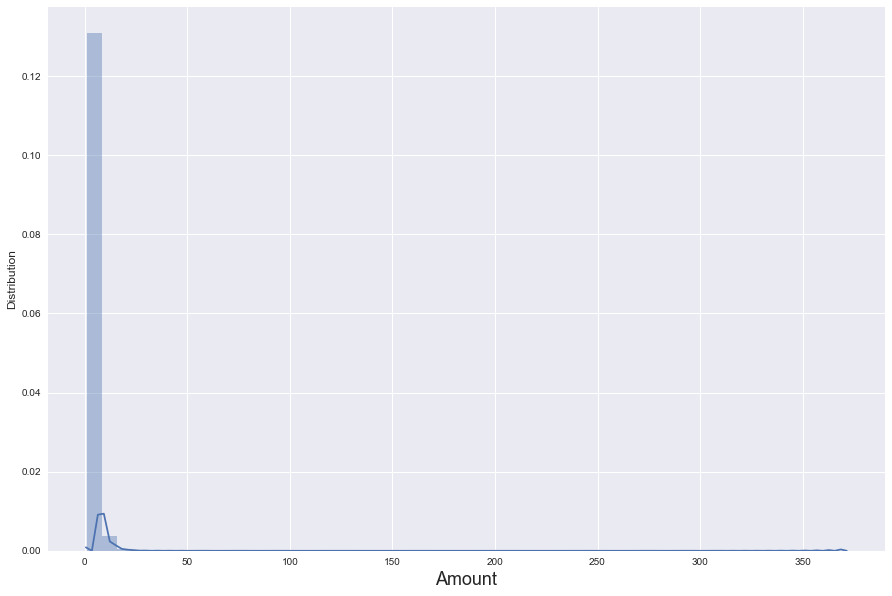

In [17]:
sns.set(rc={"figure.figsize": (15, 10)})
x = plot
sns.distplot(x)
plt.xlabel('Amount', fontsize=18)
plt.ylabel('Distribution', fontsize=12)

## choose data with IsClicked==1 from cleaned dataset

In [18]:
click_df=clicked_impressions_df[clicked_impressions_df['IsClicked']==1]

In [19]:
click_df

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount
165,7cda3ca8-4c62-4af0-85aa-5f3cd1af2557,0000e7a6-5cb4-4781-a56e-ffe2c72b1e33,3.0,2017-06-02 11:58:37,b0A5v,58c447ee-410e-4614-b8e6-f141f560abf5,2017-06-02 11:58:46,1.0,58c447ee-410e-4614-b8e6-f141f560abf5,250.0,200000.0,4284.0,815.0
169,6cd04e50-d67f-4de6-9bb5-c129cb89af31,00016f8e-558b-4659-82f2-a9db75d05ea9,14.0,2017-06-02 18:16:12,Wppak,cc242a98-5555-4f6b-b228-79c1e1bf0e64,2017-06-02 18:16:28,1.0,NaN,NaN,NaN,NaN,NaN
177,b8c0f90b-6162-48cc-b1fb-efde730dbe86,000191d1-4a15-4ce4-be00-251c90243165,8.0,2017-06-02 11:16:00,kn5PQ,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,2017-06-02 11:16:12,1.0,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,110.0,69000.0,5884.0,830.0
278,972d4518-b127-45b5-a81b-5b56654b2bf3,0001c098-2539-402f-8d6b-baa500eb48c3,1.0,2017-06-02 06:54:22,78r94,9d276ff2-4b60-4763-be1e-dea57d959d5c,2017-06-02 06:54:38,1.0,9d276ff2-4b60-4763-be1e-dea57d959d5c,35.0,34000.0,4481.0,830.0
369,1ca3873b-7067-425a-ac1a-477989931a21,00021179-0e1f-437a-97d5-284a0ba25b48,25.0,2017-06-02 18:12:45,OxvGO,e5409149-7ecc-452f-8dac-26365e5e7060,2017-06-02 18:12:52,1.0,e5409149-7ecc-452f-8dac-26365e5e7060,60.0,43000.0,3871.0,356.0
385,263c7c01-67a9-4181-b955-94b103996907,00027a10-9f1e-46e6-9ebb-d4bb44fea132,1.0,2017-06-02 19:13:03,6OL3e,97aca567-25f5-471a-8c34-06b740c6b5af,2017-06-02 19:13:20,1.0,97aca567-25f5-471a-8c34-06b740c6b5af,50.0,45000.0,2900.0,331.0
498,c53872ec-ab9f-41dc-9f6f-fc922dbeea9b,000323b0-e5a3-4952-b2bf-9235efb03b5b,20.0,2017-06-02 16:19:35,yAAMA,62701c2c-523c-471a-836c-253724f4cfeb,2017-06-02 16:19:51,1.0,62701c2c-523c-471a-836c-253724f4cfeb,350.0,177000.0,7556.0,1572.0
513,08e41755-ebb1-4970-a22f-d29bd9d613ba,00042775-27c9-4b01-8b43-f96416be4413,28.0,2017-06-02 11:58:38,az694,786f6ea6-e393-46eb-a5df-a92f66530cc0,2017-06-02 11:58:48,1.0,786f6ea6-e393-46eb-a5df-a92f66530cc0,34.0,35000.0,1959.0,195.0
596,52b58969-584e-437a-8b26-a4d01dd64ba1,0004dbdf-aa5e-4bd5-af81-a66a65c0635c,7.0,2017-06-02 08:08:19,vRqxV,73c52c48-4545-40e6-b060-5fb2cd6e516a,2017-06-02 08:08:25,1.0,73c52c48-4545-40e6-b060-5fb2cd6e516a,55.0,52000.0,2519.0,187.0
616,69d05b5f-82d6-4e84-8fa4-94b7699a58d3,0004ed66-6bc1-4a11-b8c1-b9443dac1c7b,23.0,2017-06-02 04:46:43,4p2WR,c29acdb4-4d2a-446a-8137-b9ccb9890190,2017-06-02 04:46:56,1.0,c29acdb4-4d2a-446a-8137-b9ccb9890190,452.0,160000.0,7713.0,2092.0


### change time stamp and merge a new column 

In [20]:
click_df['Time']=click_df.impressionTimestamp.apply(lambda x: x.hour)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
position1=click_df.contentPosition.value_counts()
a=position1.sort_index()

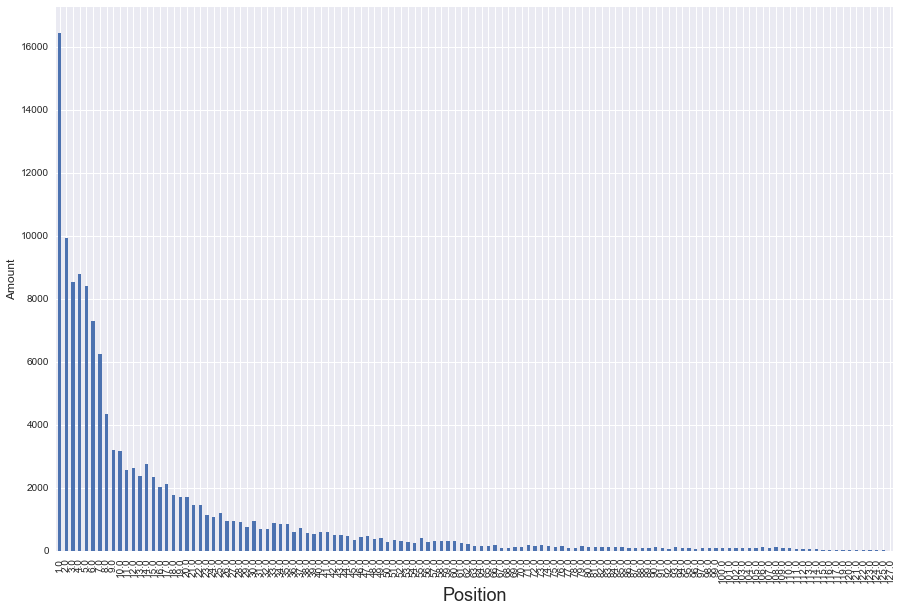

In [22]:
sns.set(rc={"figure.figsize": (15, 10)})
a.plot(kind='bar')
plt.xlabel('Position', fontsize=18)
plt.ylabel('Amount', fontsize=12)

In [23]:
# # fig = sns.kdeplot(click_df.Time, shade=True, color='red',cut =0, clip=(0,2000))
# fig = sns.kdeplot(click_df.contentPosition, shade=True, color='blue',cut =0, clip=(0,2000))

# fig.figure.suptitle("Content position with click analysis", fontsize = 24)

# plt.xlabel('Position', fontsize=18)
# plt.ylabel('Distribution', fontsize=16)

In [24]:
time1=click_df.Time.value_counts()
a=time1.sort_index()

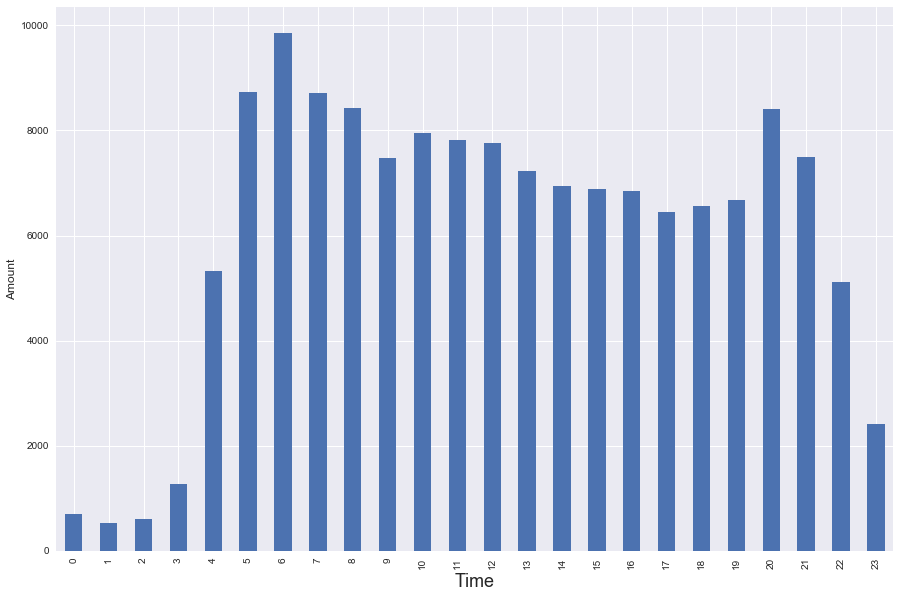

In [25]:
sns.set(rc={"figure.figsize": (15, 10)})
a.plot(kind='bar')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amount', fontsize=12)

In [26]:
# fig = sns.kdeplot(click_df.Time, shade=True, color='red',cut =0, clip=(0,2000))
# # fig = sns.kdeplot(click_df.contentPosition, shade=True, color='blue',cut =0, clip=(0,2000))

# fig.figure.suptitle("Time by hour with click analysis", fontsize = 24)

# plt.xlabel('Time', fontsize=18)
# plt.ylabel('Distribution', fontsize=16)

## analysis of a specific content

In [27]:
a=click_df[click_df.contentId=='kn5PQ']

In [28]:
a.sort_values('contentWordCount')

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
3261159,3167b983-dc9d-4f29-9284-376c04fa4782,833ab237-18ed-44a0-9073-a3cb05c9b133,6.0,2017-06-02 08:49:48,kn5PQ,6f015253-f3c7-48ca-8ab3-aaf6858b30ae,2017-06-02 08:49:53,1.0,6f015253-f3c7-48ca-8ab3-aaf6858b30ae,80.0,58000.0,4800.000000,820.0,8
3408281,f9da04a8-14ae-4caa-b2ed-36ca90782249,89487eb4-6160-4a90-b0e6-aeba4b9d4577,6.0,2017-06-02 08:41:06,kn5PQ,d1a848b8-8667-4551-8b72-44df5e22f6b4,2017-06-02 08:41:16,1.0,d1a848b8-8667-4551-8b72-44df5e22f6b4,70.0,66000.0,5226.399902,820.0,8
3408122,72fe6fa5-60da-4127-8e39-97dec02bf3f8,89478c0f-6e54-422b-bf3a-bc2d57680a7e,6.0,2017-06-02 08:41:44,kn5PQ,61dc78c7-4d61-4294-b99b-b0d6225ba265,2017-06-02 08:41:55,1.0,61dc78c7-4d61-4294-b99b-b0d6225ba265,15.0,11000.0,2790.000000,820.0,8
3397318,b659d0bd-f4e6-466f-95bf-6056f02dbe16,88cfb36f-653f-4a1e-8d40-02d474d475c3,7.0,2017-06-02 10:56:00,kn5PQ,c6b049bc-d339-4796-a28b-b71564fd76d3,2017-06-02 10:56:08,1.0,c6b049bc-d339-4796-a28b-b71564fd76d3,73.0,66000.0,5037.000000,820.0,10
3395179,05acc28c-afc6-46e8-b6e1-9419eab5f37f,88b6f7f6-c095-440f-841b-82ef5879e84b,7.0,2017-06-02 10:22:17,kn5PQ,70d44a3c-0ef3-4381-939e-73b7a947bf71,2017-06-02 10:22:27,1.0,70d44a3c-0ef3-4381-939e-73b7a947bf71,140.0,53000.0,4735.000000,820.0,10
3395100,d4f3e0cd-5668-49ae-b053-c9d156548c89,88b663b9-4d41-46eb-a79b-758b19726976,7.0,2017-06-02 10:46:10,kn5PQ,9e8123e6-f23a-4a80-9d25-435ba6fb1a9c,2017-06-02 10:46:24,1.0,9e8123e6-f23a-4a80-9d25-435ba6fb1a9c,234.0,78000.0,4900.000000,820.0,10
3388765,72818aae-c9a0-42c9-916e-d4970ce14ec0,8876562f-7b4c-4b40-a9c4-08340a4f003e,7.0,2017-06-02 10:41:22,kn5PQ,d5db8e70-cb11-4fe7-853c-8935280605ad,2017-06-02 10:41:31,1.0,d5db8e70-cb11-4fe7-853c-8935280605ad,30.0,29000.0,2175.000000,820.0,10
3386036,e8a755ac-9d3e-4d0e-b1db-a072cdbebab1,885d16db-0b33-453e-ab7b-45ffb52e3aa6,6.0,2017-06-02 08:35:44,kn5PQ,3cb548c3-385a-4ded-ad7e-fbb804d1ade7,2017-06-02 08:36:10,1.0,3cb548c3-385a-4ded-ad7e-fbb804d1ade7,324.0,182000.0,3500.000000,820.0,8
3385262,9df6975e-5bc0-4472-8a5d-628c4195c657,8855e3ed-3ba0-4975-8fd6-3415e82cf767,6.0,2017-06-02 09:16:22,kn5PQ,dae34000-721e-4abe-bb84-87c80c12ea63,2017-06-02 09:16:29,1.0,dae34000-721e-4abe-bb84-87c80c12ea63,40.0,39000.0,3999.000000,820.0,9
3354874,20572ce5-bdac-476c-8a81-bdc5ca09879f,870bcd8e-7e9e-4563-b29b-d60f7e3e06a8,47.0,2017-06-02 21:29:10,kn5PQ,c080dea9-09d9-4b34-941b-60f412066d3e,2017-06-02 21:29:37,1.0,c080dea9-09d9-4b34-941b-60f412066d3e,55.0,54000.0,3859.000000,820.0,21


In [29]:
type(a)

pandas.core.frame.DataFrame

In [30]:
b=a.dropna()

In [31]:
b.sort_values('contentWordCount')

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
3273268,9fa4bbcc-98e9-4aba-b56c-9e3def3b3995,83b4cf1f-da50-409f-a65e-0eb36558da47,7.0,2017-06-02 10:53:54,kn5PQ,fb1f14b5-23e7-486f-ac63-92ba2bdf9ea3,2017-06-02 10:54:01,1.0,fb1f14b5-23e7-486f-ac63-92ba2bdf9ea3,84.0,67000.0,5699.000000,820.0,10
3411501,53ae7d27-4ebb-4b53-90a7-dd5e03ef46f9,896cd38a-a2c7-44f5-97d1-6134b6ea9baa,6.0,2017-06-02 08:50:02,kn5PQ,11265c35-cff4-4f7d-a520-74e8c853168d,2017-06-02 08:50:12,1.0,11265c35-cff4-4f7d-a520-74e8c853168d,239.0,38000.0,1795.000000,820.0,8
3408281,f9da04a8-14ae-4caa-b2ed-36ca90782249,89487eb4-6160-4a90-b0e6-aeba4b9d4577,6.0,2017-06-02 08:41:06,kn5PQ,d1a848b8-8667-4551-8b72-44df5e22f6b4,2017-06-02 08:41:16,1.0,d1a848b8-8667-4551-8b72-44df5e22f6b4,70.0,66000.0,5226.399902,820.0,8
3408122,72fe6fa5-60da-4127-8e39-97dec02bf3f8,89478c0f-6e54-422b-bf3a-bc2d57680a7e,6.0,2017-06-02 08:41:44,kn5PQ,61dc78c7-4d61-4294-b99b-b0d6225ba265,2017-06-02 08:41:55,1.0,61dc78c7-4d61-4294-b99b-b0d6225ba265,15.0,11000.0,2790.000000,820.0,8
3397318,b659d0bd-f4e6-466f-95bf-6056f02dbe16,88cfb36f-653f-4a1e-8d40-02d474d475c3,7.0,2017-06-02 10:56:00,kn5PQ,c6b049bc-d339-4796-a28b-b71564fd76d3,2017-06-02 10:56:08,1.0,c6b049bc-d339-4796-a28b-b71564fd76d3,73.0,66000.0,5037.000000,820.0,10
3395179,05acc28c-afc6-46e8-b6e1-9419eab5f37f,88b6f7f6-c095-440f-841b-82ef5879e84b,7.0,2017-06-02 10:22:17,kn5PQ,70d44a3c-0ef3-4381-939e-73b7a947bf71,2017-06-02 10:22:27,1.0,70d44a3c-0ef3-4381-939e-73b7a947bf71,140.0,53000.0,4735.000000,820.0,10
3395100,d4f3e0cd-5668-49ae-b053-c9d156548c89,88b663b9-4d41-46eb-a79b-758b19726976,7.0,2017-06-02 10:46:10,kn5PQ,9e8123e6-f23a-4a80-9d25-435ba6fb1a9c,2017-06-02 10:46:24,1.0,9e8123e6-f23a-4a80-9d25-435ba6fb1a9c,234.0,78000.0,4900.000000,820.0,10
3388765,72818aae-c9a0-42c9-916e-d4970ce14ec0,8876562f-7b4c-4b40-a9c4-08340a4f003e,7.0,2017-06-02 10:41:22,kn5PQ,d5db8e70-cb11-4fe7-853c-8935280605ad,2017-06-02 10:41:31,1.0,d5db8e70-cb11-4fe7-853c-8935280605ad,30.0,29000.0,2175.000000,820.0,10
3386036,e8a755ac-9d3e-4d0e-b1db-a072cdbebab1,885d16db-0b33-453e-ab7b-45ffb52e3aa6,6.0,2017-06-02 08:35:44,kn5PQ,3cb548c3-385a-4ded-ad7e-fbb804d1ade7,2017-06-02 08:36:10,1.0,3cb548c3-385a-4ded-ad7e-fbb804d1ade7,324.0,182000.0,3500.000000,820.0,8
3385262,9df6975e-5bc0-4472-8a5d-628c4195c657,8855e3ed-3ba0-4975-8fd6-3415e82cf767,6.0,2017-06-02 09:16:22,kn5PQ,dae34000-721e-4abe-bb84-87c80c12ea63,2017-06-02 09:16:29,1.0,dae34000-721e-4abe-bb84-87c80c12ea63,40.0,39000.0,3999.000000,820.0,9


In [32]:
b.sort_values('contentPosition')

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
6351681,366ff5d0-3e16-476d-a131-e3d0a7d5ad82,ffffa3be-5c99-4262-8ce0-0d60e825ed8b,6.0,2017-06-02 08:39:36,kn5PQ,8bc28cb6-24b4-438e-aa92-4b2cab232cd2,2017-06-02 08:39:50,1.0,8bc28cb6-24b4-438e-aa92-4b2cab232cd2,40.0,39000.0,3720.000000,820.0,8
1727494,61654b6e-bb46-40b7-8753-ab19cba715d0,45d8b873-32b9-4689-b4e1-e8d648bdce0a,6.0,2017-06-02 08:43:07,kn5PQ,06ae18db-7a21-4270-8200-656b4499e008,2017-06-02 08:43:16,1.0,06ae18db-7a21-4270-8200-656b4499e008,18050.0,111000.0,6557.000000,830.0,8
4445355,1217e6f1-c078-49dc-95b6-ada5242de6c0,b33fbebc-f21d-4dd9-8aad-16ef0fc4b341,6.0,2017-06-02 08:55:34,kn5PQ,1f86bfb6-05e8-40c3-85dc-bceb6566eddd,2017-06-02 08:55:36,1.0,1f86bfb6-05e8-40c3-85dc-bceb6566eddd,70.0,66000.0,5562.000000,820.0,8
4442805,29442790-941e-4ede-ad77-a7ee5d810bad,b32672fe-be39-466a-951e-3a5c54f0d405,6.0,2017-06-02 09:22:03,kn5PQ,5baeabd2-a4af-4713-9f0f-570c20a23bb8,2017-06-02 09:22:14,1.0,5baeabd2-a4af-4713-9f0f-570c20a23bb8,70.0,62000.0,3840.000000,820.0,9
4440271,ef38831f-2058-4f57-b2b9-7abafdceb5b6,b30c01fb-0055-457a-88cd-b2be2adc740c,6.0,2017-06-02 08:51:30,kn5PQ,1edae396-cd8c-44d2-b378-648a1bcb4a0c,2017-06-02 08:51:59,1.0,1edae396-cd8c-44d2-b378-648a1bcb4a0c,120.0,119000.0,7500.000000,820.0,8
1768432,36442400-fe0b-497e-8481-da10cbdec067,4783aa4f-c6ab-46dc-813e-1d4f43f01d8f,6.0,2017-06-02 08:59:31,kn5PQ,bfc5049e-d421-4e16-9dbe-502d4af87051,2017-06-02 08:59:45,1.0,bfc5049e-d421-4e16-9dbe-502d4af87051,3330.0,62000.0,3936.000000,830.0,8
1770794,6edc46c7-8394-4d65-b9f0-6ae0a7517d23,479d874a-aa9b-43b4-b8da-52115425d78d,6.0,2017-06-02 09:35:20,kn5PQ,ab2f8bbd-9a2c-4613-9c0d-509958c6ae5f,2017-06-02 09:35:32,1.0,ab2f8bbd-9a2c-4613-9c0d-509958c6ae5f,55.0,46000.0,5603.000000,820.0,9
4422494,ce3dde8a-6c94-4970-be76-ff50d3f2c30d,b25cd646-9dd2-431d-a720-e4dc96a0e6b1,6.0,2017-06-02 09:20:26,kn5PQ,7cefdf1a-1d4c-4ccf-ad02-32aa17c8228a,2017-06-02 09:20:51,1.0,7cefdf1a-1d4c-4ccf-ad02-32aa17c8228a,20.0,20000.0,1866.400024,830.0,9
4411806,3b0aca3b-0952-4f30-8777-e04c16bc94ef,b1ec1595-1182-46ca-90c8-84b45bc2721b,6.0,2017-06-02 08:36:02,kn5PQ,de419699-6756-49de-9630-4c4823a263aa,2017-06-02 08:36:12,1.0,de419699-6756-49de-9630-4c4823a263aa,80.0,60000.0,3778.000000,872.0,8
4409055,2d2b0ece-9301-4f9d-8409-ae8c83516aa7,b1cf6a4b-e889-401c-8929-84424ff3d2bf,6.0,2017-06-02 08:44:58,kn5PQ,466f86a5-2c91-4c71-b4a8-faeea52de5ed,2017-06-02 08:45:00,1.0,466f86a5-2c91-4c71-b4a8-faeea52de5ed,320.0,56000.0,5373.000000,820.0,8


In [33]:
b.contentWordCount.value_counts()

820.0     844
830.0     824
872.0     421
1140.0     49
831.0      38
1088.0     34
1098.0     33
821.0      27
1099.0     11
1144.0     10
834.0       9
824.0       7
1089.0      7
876.0       6
1102.0      4
1092.0      3
1651.0      1
1609.0      1
Name: contentWordCount, dtype: int64

In [34]:
c=b[b.contentWordCount==872.0]

In [35]:
c.sort_values('contentPosition')

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
6323557,04e75a5f-c822-4565-98cd-9bb67eec6a12,fee11d1e-5b44-414c-921b-d110c8338185,6.0,2017-06-02 09:10:04,kn5PQ,91d86407-6efd-4f69-9f02-bcb65582c13d,2017-06-02 09:10:07,1.0,91d86407-6efd-4f69-9f02-bcb65582c13d,4956.0,59000.0,5671.0,872.0,9
3038481,b4334bd4-ec8c-491c-b734-a596d49feda0,7a6aab7c-d52f-4518-807b-8be68fa0529f,6.0,2017-06-02 09:25:11,kn5PQ,0b6cf56c-a67d-4575-b907-4a49d376d945,2017-06-02 09:25:16,1.0,0b6cf56c-a67d-4575-b907-4a49d376d945,135.0,91000.0,4557.0,872.0,9
3077165,af8033d7-8af1-4490-8731-1d48fb2a6c0c,7bfd194d-5c9c-40db-aef7-c51d3d4c6a16,6.0,2017-06-02 08:48:25,kn5PQ,41d5d71d-97dc-4d77-9f6a-538fceac4675,2017-06-02 08:48:36,1.0,41d5d71d-97dc-4d77-9f6a-538fceac4675,25.0,24000.0,1536.0,872.0,8
4772491,e64d0bf6-49cb-446a-a000-2fed017c9249,c04a4945-2a51-4ff7-a2c2-1a50c613a36f,6.0,2017-06-02 09:28:36,kn5PQ,ee37a660-3090-4942-96b1-f66a31ea1f64,2017-06-02 09:28:43,1.0,ee37a660-3090-4942-96b1-f66a31ea1f64,45.0,31000.0,4130.0,872.0,9
3084722,6c3c3eda-ae15-4afc-be4d-776c4fc93145,7c43f757-5d0e-420f-beac-db341172bf95,6.0,2017-06-02 09:58:54,kn5PQ,7017f3bc-8f25-4616-b8ec-9be7d67b550b,2017-06-02 09:59:08,1.0,7017f3bc-8f25-4616-b8ec-9be7d67b550b,30.0,21000.0,1793.0,872.0,9
4744919,d1090a96-49aa-47bb-a4aa-624259baa0bc,bf3e341d-6aac-4514-8b9a-dc7ae4ca3173,6.0,2017-06-02 08:29:30,kn5PQ,74bd9c15-3df6-4d27-ba85-5bcaadaaf3f8,2017-06-02 08:29:39,1.0,74bd9c15-3df6-4d27-ba85-5bcaadaaf3f8,1656.0,44000.0,2938.0,872.0,8
4661867,26ce9fb0-94fe-4621-9b7c-8083a673d7f0,bbf3e48f-3bc7-48e0-8238-c697740630b4,6.0,2017-06-02 08:58:59,kn5PQ,c0590ffa-0d55-4a52-b1f1-ec33a04b39c7,2017-06-02 08:59:05,1.0,c0590ffa-0d55-4a52-b1f1-ec33a04b39c7,125.0,117000.0,7487.0,872.0,8
1121093,460d6722-eb20-4997-86a4-477ee6129c7d,2d79b3d6-08cb-4433-a579-310e63a62ac4,6.0,2017-06-02 09:11:57,kn5PQ,c660218f-9efd-4e4a-bd97-58a53d050ad4,2017-06-02 09:12:03,1.0,c660218f-9efd-4e4a-bd97-58a53d050ad4,2177.0,97000.0,5958.0,872.0,9
3098374,d695c1e9-ebb2-42f2-b9be-92238c5ae939,7ccb0e0d-3a0c-4ba4-970a-3fe0893b551e,6.0,2017-06-02 09:11:43,kn5PQ,3cc592ca-697c-412f-a7d1-63f35bc139f0,2017-06-02 09:11:48,1.0,3cc592ca-697c-412f-a7d1-63f35bc139f0,83.0,28000.0,1684.0,872.0,9
4530100,77f770a2-bb09-4002-bb19-84fba3a4a2ae,b6c56628-cdb9-423d-9016-d27d87ab24fb,6.0,2017-06-02 08:50:43,kn5PQ,eef7c539-8a27-4c79-855d-761e985aacaa,2017-06-02 08:50:50,1.0,eef7c539-8a27-4c79-855d-761e985aacaa,45.0,37000.0,2167.0,872.0,8


In [36]:
c.sort_values('clickTimestamp')

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
4744919,d1090a96-49aa-47bb-a4aa-624259baa0bc,bf3e341d-6aac-4514-8b9a-dc7ae4ca3173,6.0,2017-06-02 08:29:30,kn5PQ,74bd9c15-3df6-4d27-ba85-5bcaadaaf3f8,2017-06-02 08:29:39,1.0,74bd9c15-3df6-4d27-ba85-5bcaadaaf3f8,1656.0,44000.0,2938.0,872.0,8
1449002,5e8a7c6f-e634-4261-8f4a-1cdb7eeaed87,3a93f3bc-dc25-48ce-ae38-77a9dce300fc,6.0,2017-06-02 08:29:59,kn5PQ,4b860a97-5091-4070-aa70-30940f7a3d0f,2017-06-02 08:30:17,1.0,4b860a97-5091-4070-aa70-30940f7a3d0f,305.0,241000.0,8009.0,872.0,8
5831616,e489e15a-83a3-4f57-9e0b-d5e8ef6caef9,eaf4d79d-108c-47a9-9652-fc0276308515,6.0,2017-06-02 08:31:47,kn5PQ,ec41a4c9-31cd-42f3-8fc1-c6527264467d,2017-06-02 08:32:02,1.0,ec41a4c9-31cd-42f3-8fc1-c6527264467d,195.0,147000.0,6087.0,872.0,8
845802,a00ff674-44ae-4079-a726-c6d5f298efa2,2231beab-1ca4-4cce-8a52-404d96b62fa6,6.0,2017-06-02 08:35:36,kn5PQ,ed7fbd56-c8da-4d83-bebd-3f89b3533238,2017-06-02 08:35:52,1.0,ed7fbd56-c8da-4d83-bebd-3f89b3533238,10.0,9000.0,626.0,872.0,8
697439,875f0040-37c4-4bd9-af31-08fb3486daae,1c608a0f-53e0-485d-a57f-f692a552af00,6.0,2017-06-02 08:35:42,kn5PQ,86f98d41-e300-48ca-a11b-e0751c2c8834,2017-06-02 08:35:59,1.0,86f98d41-e300-48ca-a11b-e0751c2c8834,50.0,48000.0,3001.0,872.0,8
4411806,3b0aca3b-0952-4f30-8777-e04c16bc94ef,b1ec1595-1182-46ca-90c8-84b45bc2721b,6.0,2017-06-02 08:36:02,kn5PQ,de419699-6756-49de-9630-4c4823a263aa,2017-06-02 08:36:12,1.0,de419699-6756-49de-9630-4c4823a263aa,80.0,60000.0,3778.0,872.0,8
3866469,add0c930-3dab-493a-9361-927077e4aa86,9b93e631-e533-4c9b-8c22-1a4bc62c94e1,6.0,2017-06-02 08:36:10,kn5PQ,e93c5390-0438-4e99-9c9e-1209ceb665dc,2017-06-02 08:36:21,1.0,e93c5390-0438-4e99-9c9e-1209ceb665dc,326.0,200000.0,6071.0,872.0,8
3888639,51279dda-562f-4608-b73d-8ce99e059bfe,9c9358a1-de79-4372-bc2d-84be23046959,6.0,2017-06-02 08:37:31,kn5PQ,edb06619-65ad-491c-8dc3-7199442fe207,2017-06-02 08:37:36,1.0,edb06619-65ad-491c-8dc3-7199442fe207,40.0,36000.0,4626.0,872.0,8
1918911,c91178f3-b9c4-4066-b1a1-032602877d37,4d8ee6c6-c6ef-4a96-a424-4965d211c71a,6.0,2017-06-02 08:37:34,kn5PQ,3b3e75a4-c0a8-4cc6-af45-7cc9b38734b6,2017-06-02 08:37:38,1.0,3b3e75a4-c0a8-4cc6-af45-7cc9b38734b6,115.0,108000.0,6862.0,872.0,8
1533020,60a7100a-d920-465c-a4c9-e54d71887699,3e056367-e57c-4aeb-84d7-1ea26932575f,6.0,2017-06-02 08:43:04,kn5PQ,fcb3e152-d57d-4b42-8ee6-58170931cfca,2017-06-02 08:43:11,1.0,fcb3e152-d57d-4b42-8ee6-58170931cfca,65.0,59000.0,5520.0,872.0,8


In [37]:
b['Time']=b.impressionTimestamp.apply(lambda x: x.hour)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
b

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
177,b8c0f90b-6162-48cc-b1fb-efde730dbe86,000191d1-4a15-4ce4-be00-251c90243165,8.0,2017-06-02 11:16:00,kn5PQ,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,2017-06-02 11:16:12,1.0,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,110.0,69000.0,5884.000000,830.0,11
5227,926f1c78-518d-46ed-81a8-e8721b2a58ad,003b7b98-20a1-48e9-9acd-233413b0d797,8.0,2017-06-02 11:31:55,kn5PQ,2e42c6cf-7481-45e5-80f1-abc83f84e5b1,2017-06-02 11:32:19,1.0,2e42c6cf-7481-45e5-80f1-abc83f84e5b1,25.0,23000.0,2349.000000,872.0,11
5464,205c834b-3957-4c8d-bacf-a5795abeaa0d,003e2d16-e88e-4192-b65e-365e1d7ee6e6,36.0,2017-06-02 19:46:21,kn5PQ,b1cb84cb-446d-499b-a0ad-cd242bbfd4c9,2017-06-02 19:46:29,1.0,b1cb84cb-446d-499b-a0ad-cd242bbfd4c9,195.0,153000.0,6471.000000,872.0,19
7692,78338470-d821-497a-90de-2382260a6e8c,00514d2d-057d-43f9-9fc9-6e8135c5e7c8,6.0,2017-06-02 08:41:06,kn5PQ,8c8ba6ae-7c88-4538-9890-cf94cd927308,2017-06-02 08:41:06,1.0,8c8ba6ae-7c88-4538-9890-cf94cd927308,60.0,52000.0,5500.000000,830.0,8
8371,b1296f90-1cb8-485e-bcbb-8a70ae8dedfe,005a1342-dfb5-451d-a0c7-9fcc82cb322b,7.0,2017-06-02 10:18:09,kn5PQ,4fdeb643-1a33-49e9-b0c5-8bed68959f5a,2017-06-02 10:18:16,1.0,4fdeb643-1a33-49e9-b0c5-8bed68959f5a,30.0,27000.0,4301.000000,830.0,10
10856,fb50e4b8-b647-41f4-bf82-cd45c4617c56,0070cc35-4c6c-405a-9f1c-518b0cd0e340,6.0,2017-06-02 08:28:40,kn5PQ,d51d60f8-75d1-4a4f-9223-fbab97627f61,2017-06-02 08:28:46,1.0,d51d60f8-75d1-4a4f-9223-fbab97627f61,35.0,35000.0,5614.000000,830.0,8
15145,a7366163-2a3b-4df8-a84d-402b042a858e,009d16bc-d43a-4e8b-8899-30c9b1f1ad84,40.0,2017-06-02 20:42:46,kn5PQ,fb2e2d32-0345-4e63-aac2-393a5e96edac,2017-06-02 20:42:53,1.0,fb2e2d32-0345-4e63-aac2-393a5e96edac,45.0,45000.0,7397.000000,872.0,20
17864,e467b719-733c-4ef5-91d1-e7b8d6302115,00b96b97-c603-469e-ab7c-b06e509172f1,7.0,2017-06-02 10:03:18,kn5PQ,00106af0-26a2-4908-a1ed-a08ead2e9d47,2017-06-02 10:03:50,1.0,00106af0-26a2-4908-a1ed-a08ead2e9d47,135.0,69000.0,6120.000000,1088.0,10
25059,eaf92d3e-5329-4832-beb2-b5aeaae98dbf,01092099-4d4f-4b71-996e-8d58b8ee1ce1,8.0,2017-06-02 11:19:29,kn5PQ,ba4d68a0-cfaf-4e94-bbc6-3ff2240cf0ee,2017-06-02 11:19:47,1.0,ba4d68a0-cfaf-4e94-bbc6-3ff2240cf0ee,105.0,62000.0,4854.000000,872.0,11
29879,556a7dbe-ce27-4cb3-87d0-83c5c36fe481,0135a471-ec99-4497-8749-76018774eebb,30.0,2017-06-02 22:39:50,kn5PQ,d97edd70-7f6f-47ec-8014-871a6cd61df0,2017-06-02 22:39:58,1.0,d97edd70-7f6f-47ec-8014-871a6cd61df0,446.0,127000.0,5544.000000,872.0,22


In [39]:
time=b.Time.tolist()

In [40]:
position=b.contentPosition.tolist()

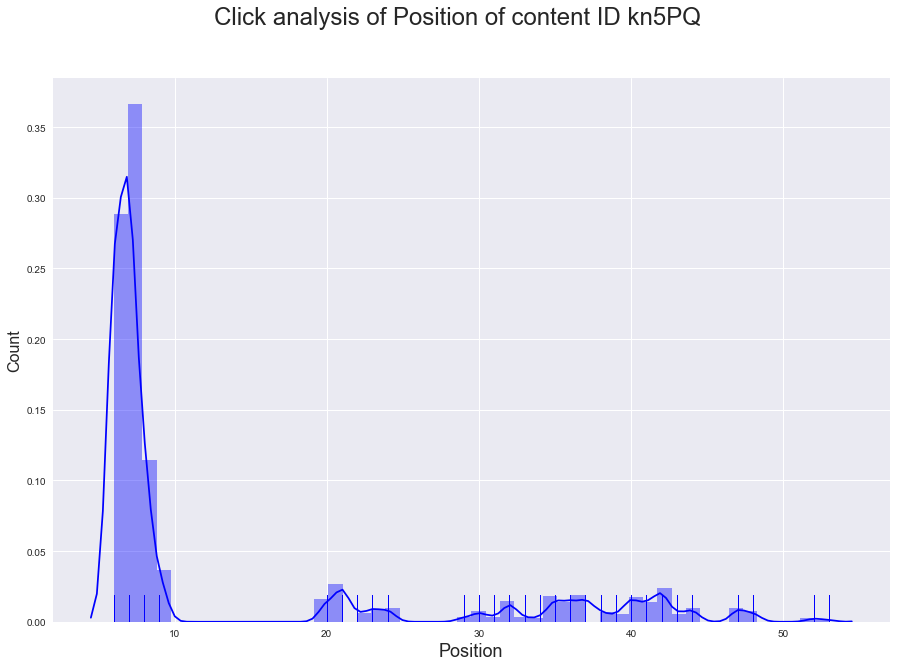

In [49]:
fig = sns.distplot(b.contentPosition,kde=True, rug=True,color='blue')
fig.figure.suptitle("Click analysis of Position of content ID kn5PQ", fontsize = 24)

plt.xlabel('Position', fontsize=18)
plt.ylabel('Count', fontsize=16)

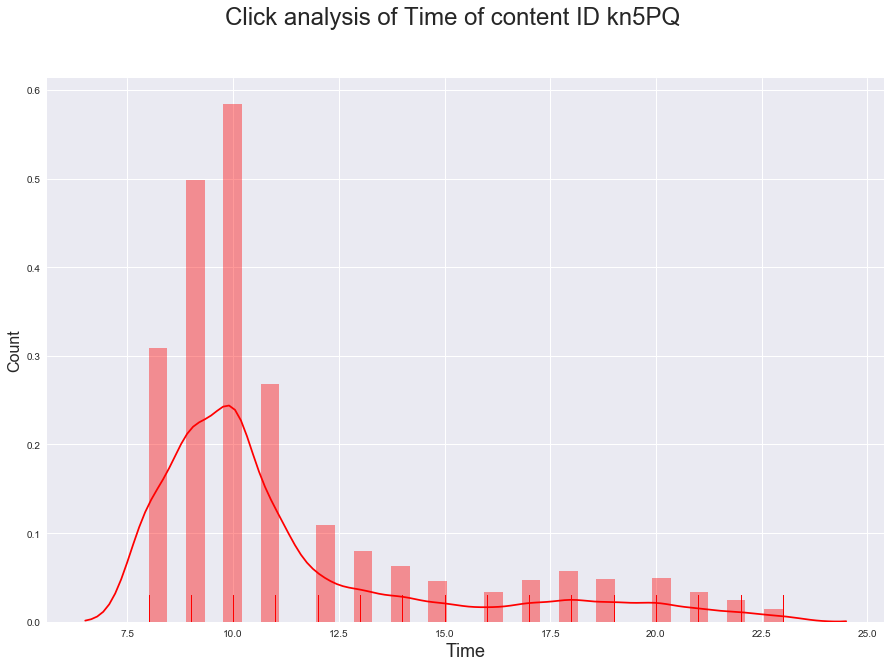

In [42]:
fig = sns.distplot(b.Time,kde=True, rug=True, color='red')
fig.figure.suptitle("Click analysis of Time of content ID kn5PQ", fontsize = 24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Count', fontsize=16)

In [43]:
eg=click_df[click_df.contentId=='0Rmd2']

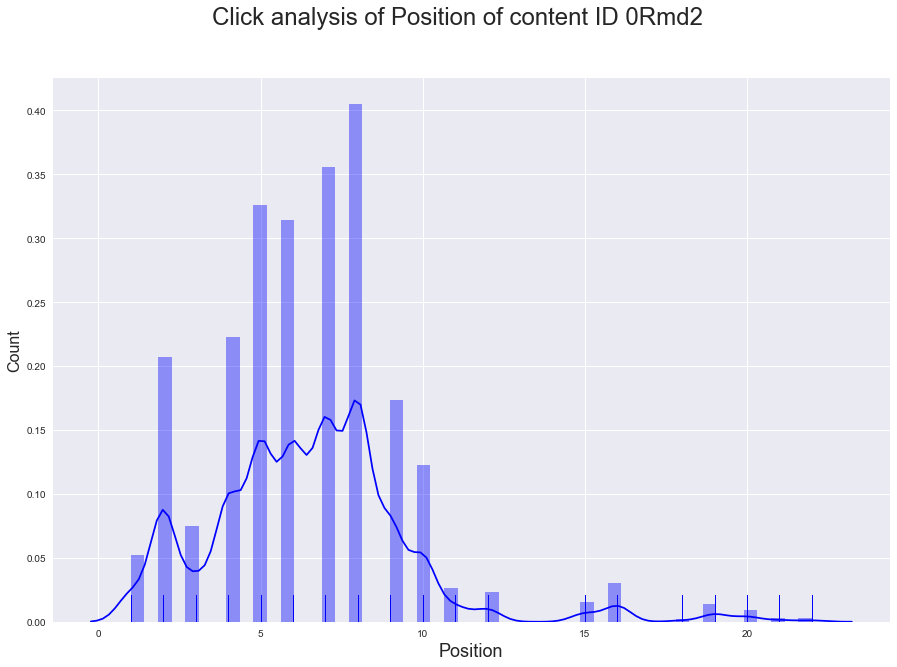

In [44]:
fig = sns.distplot(eg.contentPosition,kde=True, rug=True,color='blue')
fig.figure.suptitle("Click analysis of Position of content ID 0Rmd2", fontsize = 24)

plt.xlabel('Position', fontsize=18)
plt.ylabel('Count', fontsize=16)

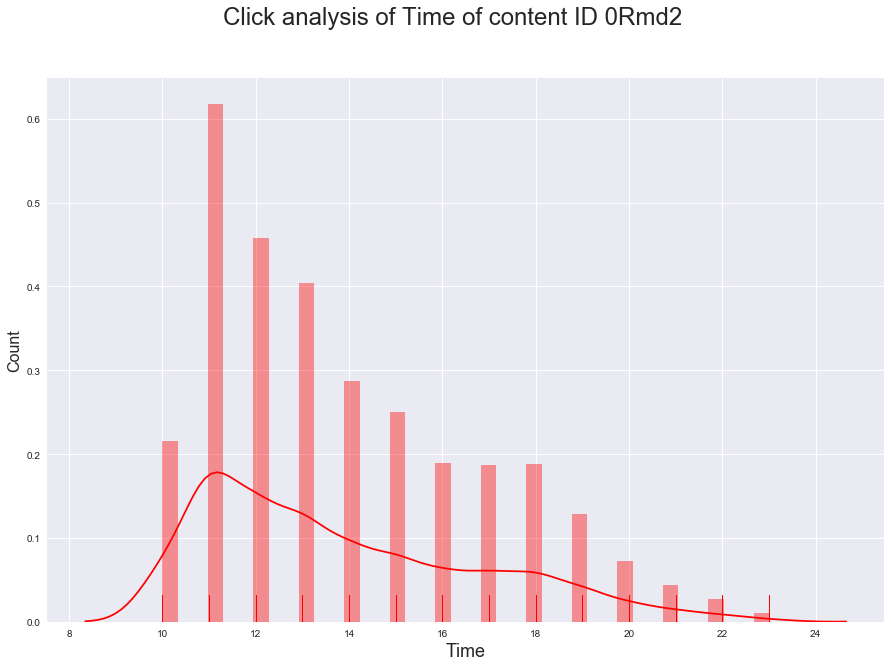

In [53]:
fig = sns.distplot(eg.Time,kde=True, rug=True, bins=40, color='red')
fig.figure.suptitle("Click analysis of Time of content ID 0Rmd2", fontsize = 24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Count', fontsize=16)

### relations between duration and content position 

In [60]:
plot2=(click_df.maxDuration.dropna()).value_counts()

In [68]:
plot3=plot2.sort_index()

1000.0         28
2000.0         84
3000.0        183
4000.0       2508
5000.0       2181
6000.0        221
7000.0        311
8000.0        464
9000.0       2678
10000.0      2407
11000.0       396
12000.0       574
13000.0       730
14000.0      2507
15000.0      2365
16000.0       581
17000.0       760
18000.0       928
19000.0      2415
20000.0      2165
21000.0       772
22000.0       934
23000.0      1103
24000.0      2403
25000.0      2099
26000.0       950
27000.0      1052
28000.0      1172
29000.0      2256
30000.0      1976
             ... 
925000.0        1
942000.0        1
944000.0        2
949000.0        1
951000.0        1
970000.0        1
983000.0        1
997000.0        1
998000.0        1
1006000.0       1
1022000.0       1
1025000.0       1
1026000.0       1
1029000.0       1
1047000.0       1
1048000.0       1
1073000.0       1
1098000.0       1
1108000.0       1
1109000.0       1
1112000.0       1
1121000.0       1
1144000.0       1
1162000.0       2
1207000.0 

In [69]:
plot3=plot2.sort_index()

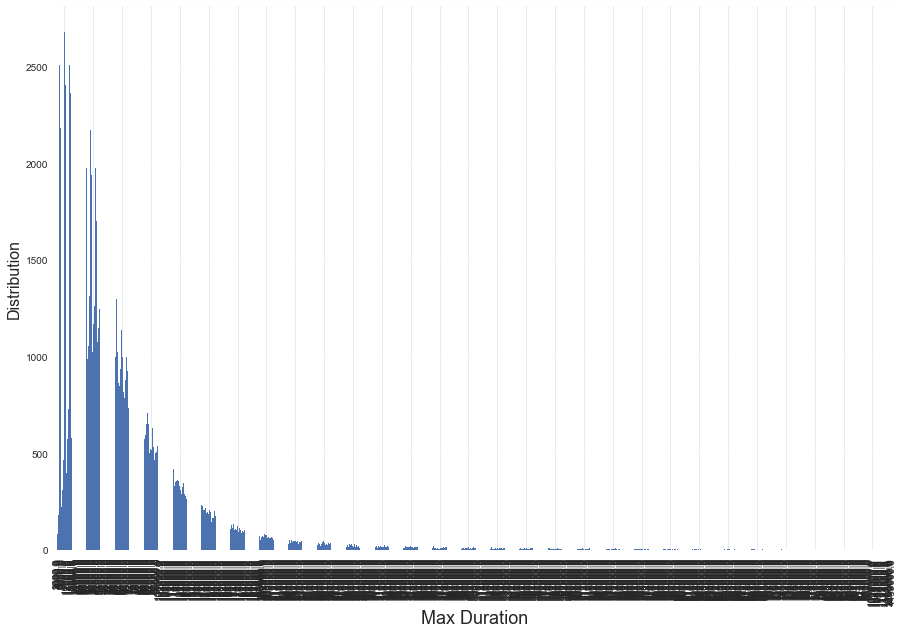

In [71]:
sns.set(rc={"figure.figsize": (15, 10)})
plot3.plot(kind='bar')

fig.figure.suptitle("Distribution of Max Duration", fontsize = 24)

plt.xlabel('Max Duration', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

In [72]:
click_df.maxDuration.max()

4439000.0

In [73]:
click_df.head()

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount,Time
165,7cda3ca8-4c62-4af0-85aa-5f3cd1af2557,0000e7a6-5cb4-4781-a56e-ffe2c72b1e33,3.0,2017-06-02 11:58:37,b0A5v,58c447ee-410e-4614-b8e6-f141f560abf5,2017-06-02 11:58:46,1.0,58c447ee-410e-4614-b8e6-f141f560abf5,250.0,200000.0,4284.0,815.0,11
169,6cd04e50-d67f-4de6-9bb5-c129cb89af31,00016f8e-558b-4659-82f2-a9db75d05ea9,14.0,2017-06-02 18:16:12,Wppak,cc242a98-5555-4f6b-b228-79c1e1bf0e64,2017-06-02 18:16:28,1.0,NaN,NaN,NaN,NaN,NaN,18
177,b8c0f90b-6162-48cc-b1fb-efde730dbe86,000191d1-4a15-4ce4-be00-251c90243165,8.0,2017-06-02 11:16:00,kn5PQ,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,2017-06-02 11:16:12,1.0,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,110.0,69000.0,5884.0,830.0,11
278,972d4518-b127-45b5-a81b-5b56654b2bf3,0001c098-2539-402f-8d6b-baa500eb48c3,1.0,2017-06-02 06:54:22,78r94,9d276ff2-4b60-4763-be1e-dea57d959d5c,2017-06-02 06:54:38,1.0,9d276ff2-4b60-4763-be1e-dea57d959d5c,35.0,34000.0,4481.0,830.0,6
369,1ca3873b-7067-425a-ac1a-477989931a21,00021179-0e1f-437a-97d5-284a0ba25b48,25.0,2017-06-02 18:12:45,OxvGO,e5409149-7ecc-452f-8dac-26365e5e7060,2017-06-02 18:12:52,1.0,e5409149-7ecc-452f-8dac-26365e5e7060,60.0,43000.0,3871.0,356.0,18


In [74]:
mean=click_df.groupby('contentId')['maxDuration'].mean()

In [75]:
mean

contentId
0R22B     64193.548387
0R23B     88394.736842
0R2Vg     54350.877193
0RAdG     92979.381443
0Rmd2     54863.037448
0RmmA     47979.133226
0Rpl2    152000.000000
0Rx26    111000.000000
1l23Q     65509.803922
1lEMQ     36205.479452
1lEnX     36635.135135
1laRl     52000.000000
262Xx     55120.000000
267Ex     97000.000000
26vRa    127089.622642
3A8RA     67640.000000
3AAQq    122422.077922
3AyoA     57004.504505
4p2WR    193291.366906
4p4yq    125000.000000
4pM1R     51942.094990
4ppk9     79000.000000
5XkMK    105666.666667
5aXBE    173000.000000
6O7Er    115397.550111
6OExO     44000.000000
6OL3e     36449.243746
6OQzr     81555.555556
6Ob9z     24166.666667
6ObjO     50713.017751
             ...      
rxwG3     15000.000000
rxww0     59589.557650
vRL4L     45459.459459
vRLqm     65630.630631
vRqVj     72058.823529
vRqxV     51969.840893
wl1qA     52517.587940
wlBoG              NaN
wlWOA     42336.842105
wlqX1    102907.894737
x66VX     84564.202335
x6aRn     56334.384858
x

In [76]:
list(mean)

[64193.548387096773,
 88394.736842105267,
 54350.877192982458,
 92979.381443298975,
 54863.037447988907,
 47979.133226324237,
 152000.0,
 111000.0,
 65509.803921568629,
 36205.479452054795,
 36635.135135135133,
 52000.0,
 55120.0,
 97000.0,
 127089.62264150943,
 67640.0,
 122422.07792207792,
 57004.504504504504,
 193291.36690647481,
 125000.0,
 51942.09499024073,
 79000.0,
 105666.66666666667,
 173000.0,
 115397.55011135858,
 44000.0,
 36449.243746364162,
 81555.555555555562,
 24166.666666666668,
 50713.017751479289,
 77971.332209106244,
 30500.0,
 51042.459736456811,
 22500.0,
 134000.0,
 58422.680412371134,
 71642.857142857145,
 60055.291185134825,
 80200.0,
 19000.0,
 121394.3661971831,
 63105.26315789474,
 46442.265795206971,
 40500.0,
 59189.189189189186,
 45917.721518987339,
 95375.0,
 12000.0,
 22025.641025641027,
 72407.407407407401,
 19000.0,
 64671.949286846277,
 83113.207547169804,
 59600.0,
 130000.0,
 60266.362252663625,
 189326.08695652173,
 112526.07260726072,
 175000.0,

In [77]:
position=click_df.groupby('contentId')['contentPosition'].mean()

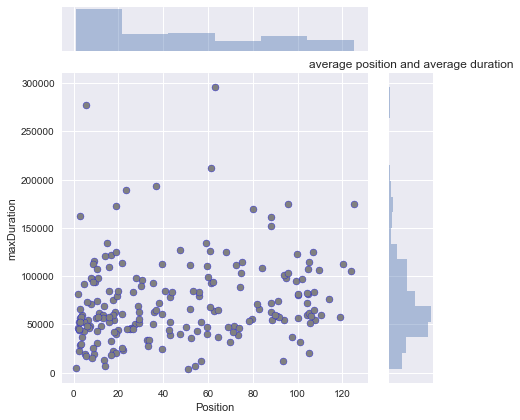

In [78]:
feature = pd.DataFrame({"maxDuration": list(mean),"Position": list(position)})
g=sns.JointGrid(x='Position',y='maxDuration',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("average position and average duration")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

In [79]:
# values = np.array([684, 434, ... , 1186])
# times = np.arange(0,len(values))
# time_labels = ['00:00', '01:00', ..., '23:00']

# plt.plot(times, values, 'o-')
# plt.xticks(times, time_labels)
# plt.show()

In [80]:
click=click_df.fillna(0)

In [81]:
avg_dura=click.groupby('contentPosition')['maxDuration'].mean()

In [82]:
list(set(click_df.contentPosition.values))

[nan,
 1.0,
 2.0,
 3.0,
 nan,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 4.0,
 nan,
 nan,
 nan,
 14.0,
 15.0,
 12.0,
 10.0,
 18.0,
 19.0,
 20.0,
 21.0,
 13.0,
 23.0,
 24.0,
 25.0,
 17.0,
 27.0,
 28.0,
 29.0,
 22.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 36.0,
 39.0,
 40.0,
 42.0,
 43.0,
 38.0,
 46.0,
 47.0,
 48.0,
 44.0,
 50.0,
 49.0,
 52.0,
 45.0,
 54.0,
 55.0,
 11.0,
 57.0,
 58.0,
 59.0,
 60.0,
 56.0,
 62.0,
 61.0,
 63.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 16.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 81.0,
 90.0,
 89.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 nan,
 nan,
 nan,
 127.0,
 26.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 30.0,
 nan,

In [83]:
a=click_df.contentPosition.unique()

In [84]:
position_df = list(set(click['contentPosition'].values))
position_df

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 127.0]

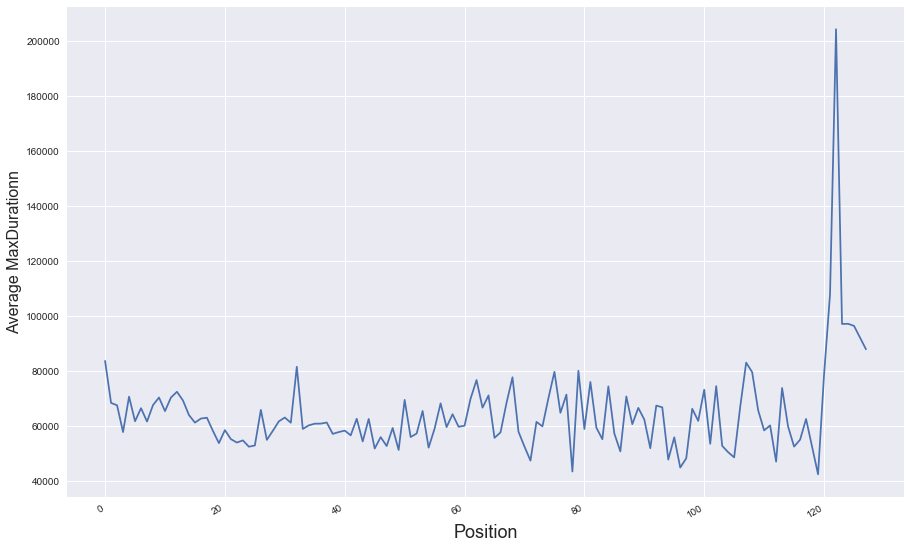

In [85]:
x = position_df
y = list(avg_dura)

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

# fig.figure.suptitle("Distribution of Max Duration", fontsize = 24)
plt.xlabel('Position', fontsize=18)
plt.ylabel('Average MaxDurationn', fontsize=16)
plt.show()